# Shoes images recognition - Sports or Formal?

## Import dependencies

In [1]:
# TensorFlow
import tensorflow as tf

# Keras
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import re
import cv2

print(tf.__version__)

Using TensorFlow backend.


1.11.0


## Define variables and functions

In [2]:
class_names = ['Sports', 'Formal']
target_size=(136,102)

In [3]:
# List all path of files under a directory

def list_pictures(path_directory):
    
    paths=[]
    
    for root, dirs, files in os.walk(path_directory):  
        for filename in files:
            paths.append(os.path.join(root, filename))
        
    return paths

In [4]:
def test_plot_image(i, predictions_array, true_label, img):
    
    prediction = predictions_array[i]
    
    true_label = np.argmax(true_label[i])
    
    img = img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:3.5f}% (Label: {})".format(class_names[predicted_label],
                                100.0*np.max(prediction),
                                class_names[true_label]),
                                color=color)

In [5]:
def predict_plot_image(img):

    color = "black"
    
    width,height=136,102
    image_resized = cv2.resize(img,(width, height))
    # cv2.imwrite('img-resize.jpg',image_resized)
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    # Normalizing from 0 to 1
    image_resized = image_resized.astype('float32')
    image_resized = image_resized / 255.0
    
    # Reshape for to feed to CNN...
    img_ready = (np.expand_dims(image_resized,0))
    
    predictions_array = model.predict(img_ready)
    
    pred = np.argmax(predictions_array)

    predicted_label = np.argmax(predictions_array)
  
    plt.xlabel("{} {:3.5f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color=color)

In [6]:
def predict_plot_path(path):
    
    color = "black"
    
    img = cv2.imread(path)
    width,height=136,102
    image_resized = cv2.resize(img,(width, height))
    # cv2.imwrite('img-resize.jpg',image_resized)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    

    # Normalizing from 0 to 1
    image_resized = image_resized.astype('float32')
    image_resized = image_resized / 255.0
    
    # Reshape for to feed to CNN...
    img_ready = (np.expand_dims(image_resized,0))
    
    predictions_array = model.predict(img_ready)
    
    pred = np.argmax(predictions_array)

    predicted_label = np.argmax(predictions_array)
  
    plt.xlabel("{} {:3.5f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color=color)

## Import dataset

In [7]:
X = []
Y = []

for picture in list_pictures('./shoesimages/Sports-clean/'):
    img = img_to_array(load_img(picture, target_size))
    X.append(img)
    Y.append(0)
    
    img_flip = np.flip(img, axis=1)
    X.append(img_flip)
    Y.append(0)
    
for picture in list_pictures('./shoesimages/Formals-clean/'):
    img = img_to_array(load_img(picture, target_size))
    X.append(img)
    Y.append(1)
    
    img_flip = np.flip(img, axis=1)
    X.append(img_flip)
    Y.append(1)

In [8]:
print('Pixel size of each image: {0}'.format(X[0].shape))

Pixel size of each image: (102, 136, 3)


In [9]:
print('Number of {0} shoes images: {1}'.format(class_names[0],Y.count(0)))
print('Number of {0} shoes images: {1}'.format(class_names[1],Y.count(1)))
print('Total images: {0}'.format(len(Y)))

Number of Sports shoes images: 13212
Number of Formal shoes images: 8048
Total images: 21260


In [10]:
# Converting to Numpy array
X = np.asarray(X)
Y = np.asarray(Y)

# Normalizing from 0 to 1
X = X.astype('float32')
X = X / 255.0

# Converting to class
Y = np_utils.to_categorical(Y, 2)

# Training data & test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [11]:
print('Number of images for training: {0}'.format(len(X_train)))
print('Number of images for testing: {0}'.format(len(X_test)))
print('Total images: {0}'.format(len(X_train) + len(X_test)))

Number of images for training: 14244
Number of images for testing: 7016
Total images: 21260


## Build Convolutional Neural Network (CNN)

In [12]:
# CNN 3 CONV
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [12]:
# CNN 2 CONV
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

## Training model (Excute either "Training model" or "Loading model")

<p>To train CNN, run this.

In [13]:
# Define callback for checkpoint
filepath="3CONVs-oversample-clean-session02-epoch{epoch:02d}-Valacc-{val_acc:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [14]:
##### TRAINING MODEL ##### 
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    batch_size=5, 
                    epochs=10, 
                    validation_data = (X_test, y_test), 
                    callbacks=[checkpointer])

Train on 14244 samples, validate on 7016 samples
Epoch 1/10
14244/14244 [==============================] - 259s 18ms/step - loss: 0.3361 - acc: 0.8586 - val_loss: 0.2088 - val_acc: 0.9209

Epoch 00001: val_acc improved from -inf to 0.92090, saving model to 3CONVs-oversample-clean-session02-epoch01-Valacc-0.9209.hdf5
Epoch 2/10
14244/14244 [==============================] - 253s 18ms/step - loss: 0.1938 - acc: 0.9231 - val_loss: 0.1578 - val_acc: 0.9414

Epoch 00002: val_acc improved from 0.92090 to 0.94142, saving model to 3CONVs-oversample-clean-session02-epoch02-Valacc-0.9414.hdf5
Epoch 3/10
14244/14244 [==============================] - 253s 18ms/step - loss: 0.1417 - acc: 0.9452 - val_loss: 0.1268 - val_acc: 0.9494

Epoch 00003: val_acc improved from 0.94142 to 0.94940, saving model to 3CONVs-oversample-clean-session02-epoch03-Valacc-0.9494.hdf5
Epoch 4/10
14244/14244 [==============================] - 253s 18ms/step - loss: 0.1134 - acc: 0.9562 - val_loss: 0.1133 - val_acc: 0.9558

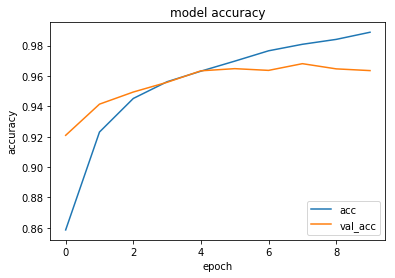

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

## Loading trained model  (Excute either "Training model" or "Loading model")

<p> To load trained model, run this.

In [14]:
##### LOADING MODEL #####

# load the network weights
filename = "3CONVs-epoch03-Valacc-0.9471.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

## Confusion matrix of the model

In [16]:
# Predict class of test data
predict_classes = model.predict_classes(X_test)

# Marging...
mg_df = pd.DataFrame({'predict': predict_classes, 'label': np.argmax(y_test, axis=1)})

# Create confusion matrix
pd.crosstab(mg_df['label'], mg_df['predict'])

predict     0     1
label              
0        4136   185
1          71  2624

## Testing CNN

In [37]:
# Get output on final layer
predict_array = model.predict(X_test)

### Listing False Formal

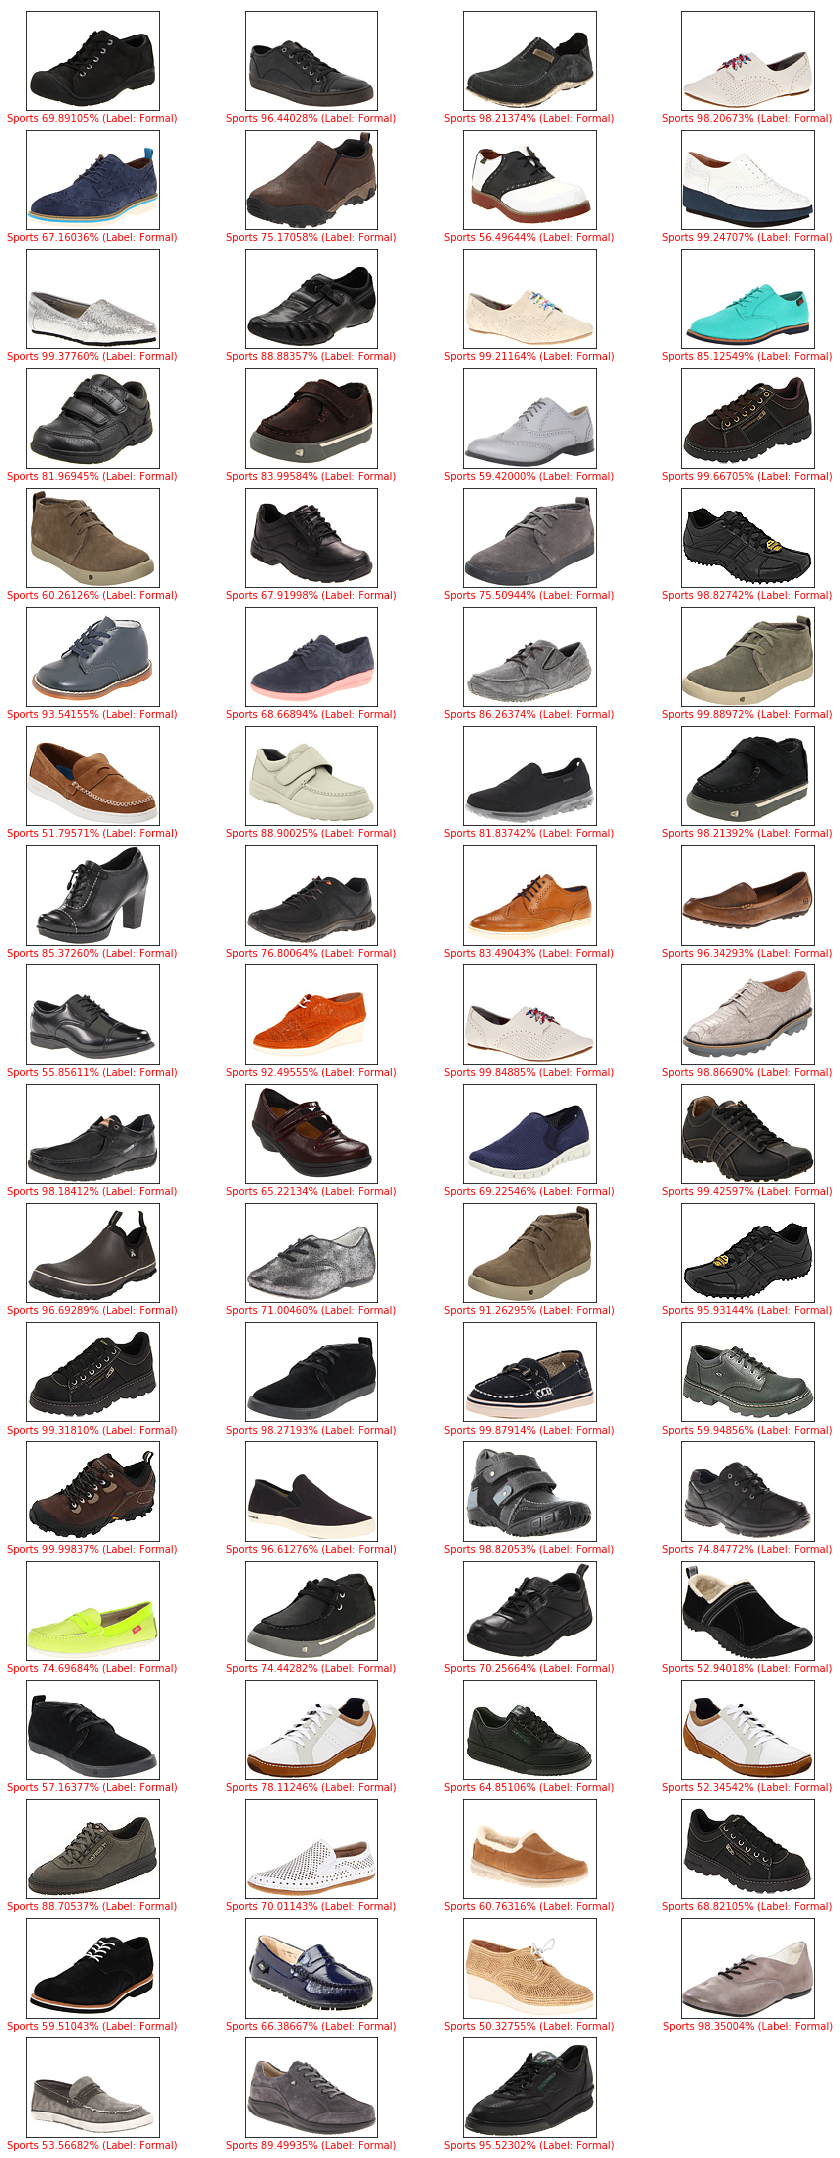

In [38]:
fig = plt.figure(figsize=(15,140))
for i, j in enumerate(mg_df[(mg_df["predict"]!=mg_df["label"]) & (mg_df["predict"]==0)].index):
    plt.subplot(50,4,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    test_plot_image(j, predict_array, y_test, X_test)
    
fig.savefig("./saved/errors-oversampling-clean-false-sports.jpg")

### False Formal

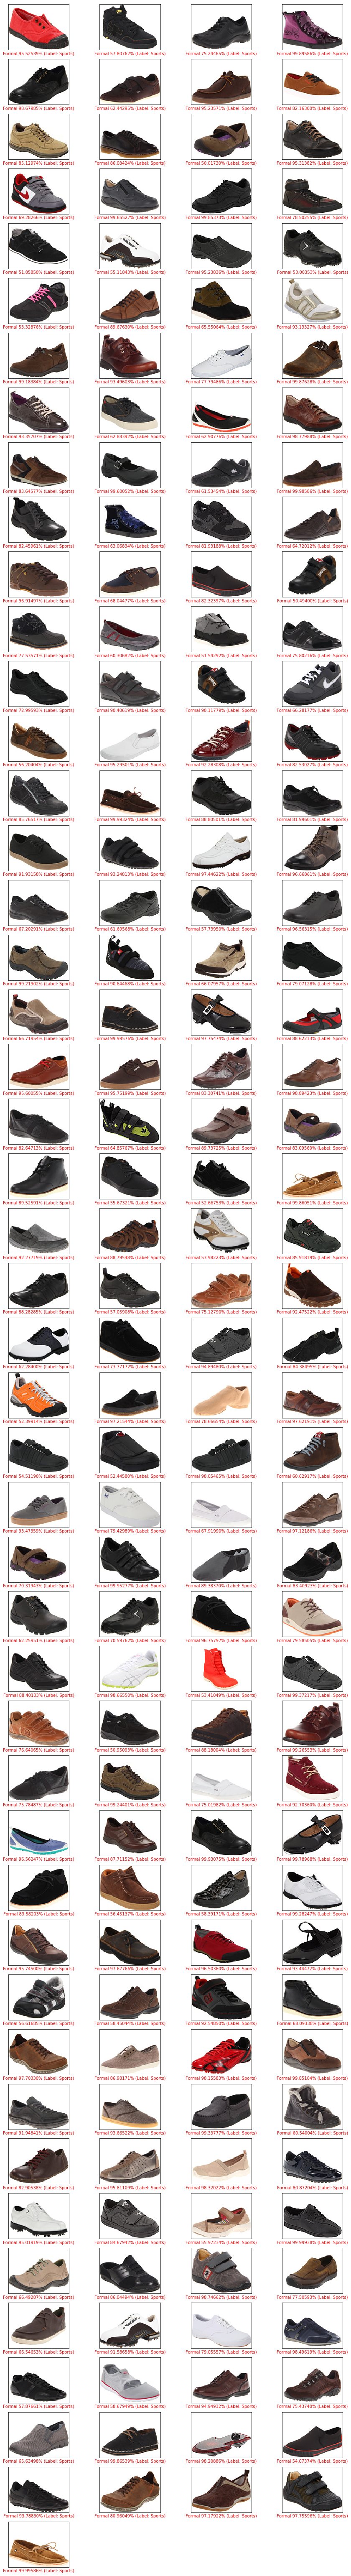

In [40]:
fig = plt.figure(figsize=(15,120))
for i, j in enumerate(mg_df[(mg_df["predict"]!=mg_df["label"]) & (mg_df["predict"]==1)].index):
    plt.subplot(50,4,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    test_plot_image(j, predict_array, y_test, X_test)
    
fig.savefig("./saved/errors-oversampling-clean-false-formal.jpg")

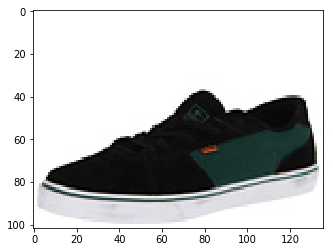

In [22]:
plt.imshow(X_test[0])

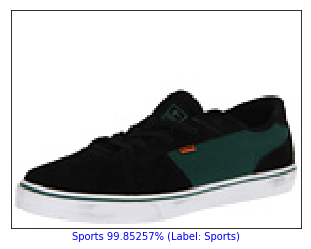

In [21]:
test_plot_image(0, predict_array, y_test, X_test)

Text(0.5,0,'Formal 100%')

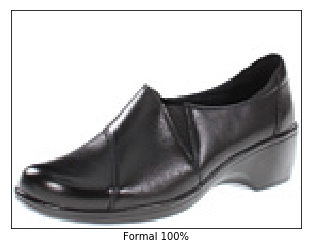

In [53]:
img = cv2.imread('./shoesimages/Formals/7995755.3.jpg')
width,height=136,102
image_resized = cv2.resize(img,target_size)

plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.imshow(img, cmap=plt.cm.binary)

# Reshape for one image input...
img_ready = (np.expand_dims(image_resized,0))

predictions_array = model.predict(img_ready)

# print(predictions_array)

pred = np.argmax(predictions_array)

predicted_label = np.argmax(predictions_array)

# print(predicted_label)

plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                            100*np.max(predictions_array)),
                            color="black")

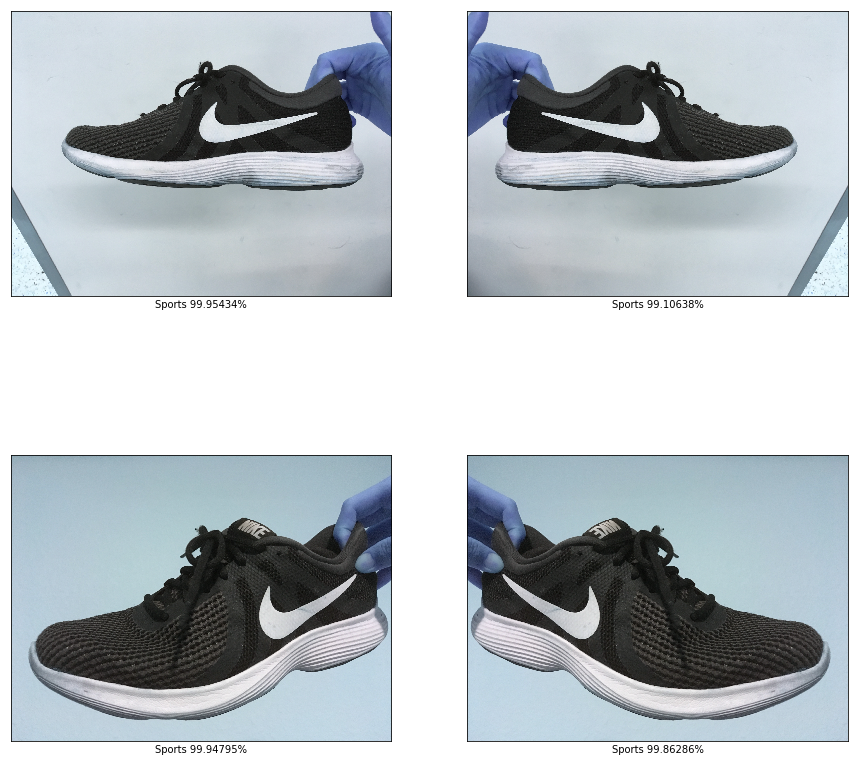

In [24]:
fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
predict_plot_path("./shoesimages/demos/daichi-side-flip.jpg")
plt.subplot(2,2,2)
predict_plot_path("./shoesimages/demos/daichi-side.jpg")
plt.subplot(2,2,3)
predict_plot_path("./shoesimages/demos/daichi-angle.jpg")
plt.subplot(2,2,4)
predict_plot_path("./shoesimages/demos/daichi-angle-flip.jpg")
plt.show()
fig.savefig("./saved/errors_NIKE")

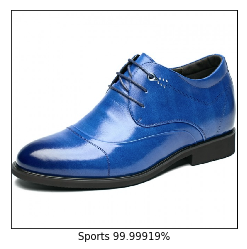

In [25]:
predict_plot_path("./shoesimages/demos-net/Screen Shot 2018-12-15 at 11.45.55 AM.png")

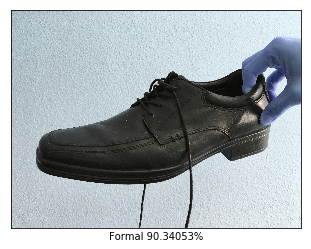

In [26]:
predict_plot_path("./shoesimages/demos/Rodri01.jpg")

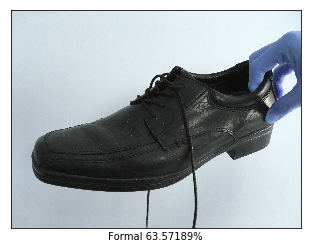

In [27]:
predict_plot_path("./shoesimages/demos/Rodri02.jpg")

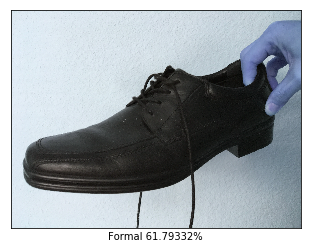

In [28]:
predict_plot_path("./shoesimages/demos/Rodri03.jpg")

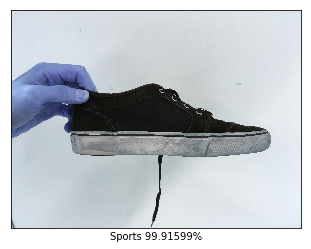

In [29]:
predict_plot_path("./shoesimages/demos/jason.jpg")

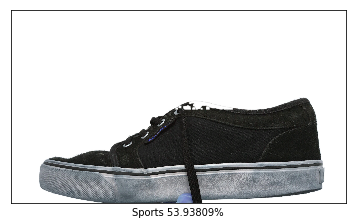

In [30]:
predict_plot_path("./shoesimages/demos-removeback/real_shoe_new.jpg")

### Structure of CNN

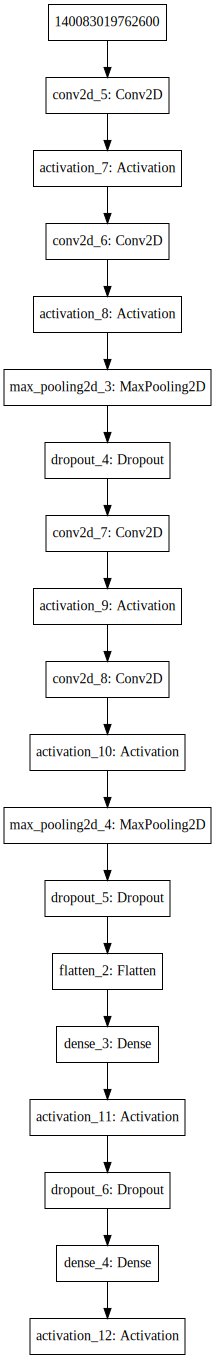

In [27]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

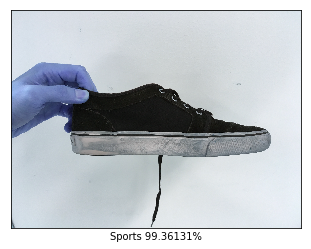

In [28]:
predict_plot_path("./shoesimages/demos/jason.jpg")

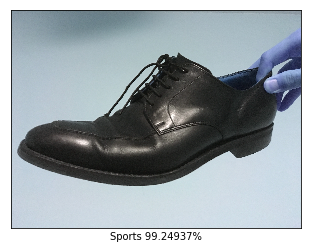

In [31]:
predict_plot_path("./shoesimages/demos/suit.jpg")

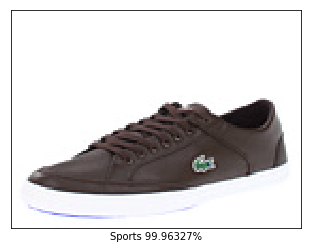

In [32]:
predict_plot_path('./shoesimages/Sports/8050353.134358.jpg')

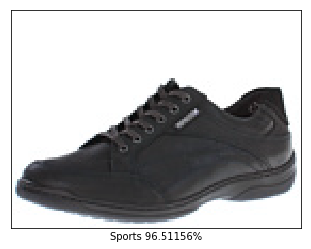

In [33]:
predict_plot_path('./shoesimages/Sports/8015415.368126.jpg')

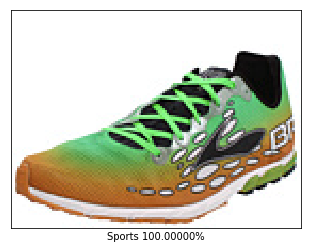

In [34]:
predict_plot_path('./shoesimages/Sports/7978868.356741.jpg')

tabby, tabby cat (score = 0.33234)
tiger cat (score = 0.25924)
Persian cat (score = 0.11315)
Egyptian cat (score = 0.10286)
lynx, catamount (score = 0.00452)


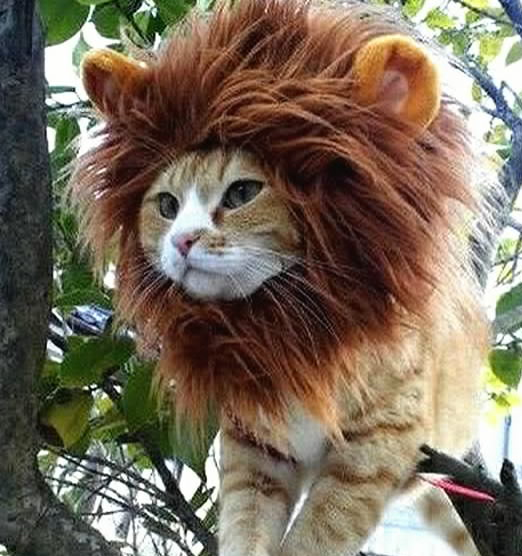

In [9]:
image_path = '../dsl-lab5/imgs/maybeTabbyCat.jpg'
%run classify_image.py --image_file $image_path
Image(filename=image_path)

seashore, coast, seacoast, sea-coast (score = 0.24499)
coral reef (score = 0.06892)
lakeside, lakeshore (score = 0.03010)
coral fungus (score = 0.02597)
hook, claw (score = 0.02172)


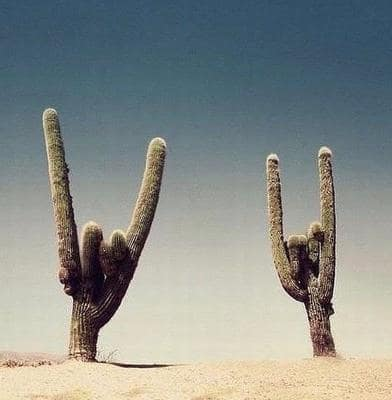

In [10]:
image_path = '../dsl-lab5/imgs/hookem.jpg'
%run classify_image.py --image_file $image_path
Image(filename=image_path)